In [163]:
import matplotlib.pyplot as plt
import numpy as np

platforms = ['Ubuntu', 'RaspberryPi', 'Android Phone']
experiment_tasks = ("MM", "Coding", "I/O", "Networking")

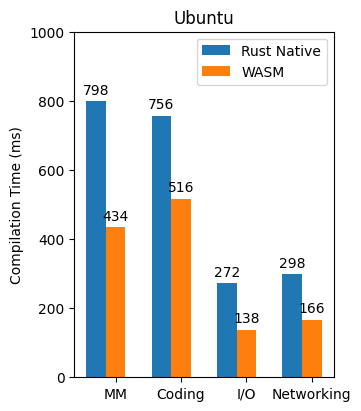

In [164]:
# compilation time

# experiment_tasks = ("Matrix Multiplication", "Huffman Coding", "I/O")
avg_runtimes = {
    'Ubuntu': {
        'Rust Native': (0.798, 0.756, 0.272, 0.298),
        'WASM': (0.434, 0.516, 0.138, 0.166),
    },
    'RaspberryPi': {
        'Rust Native': (3.13, 2.6, 1.21, 1.3),
        'WASM': (4.51, 3.45, 1.36, 1.61),
    }
}

x = np.arange(len(experiment_tasks))  # the label locations
width = 0.3  # the width of the bars


fig, ax = plt.subplots(figsize=(3.5, 4), layout='constrained')
multiplier = 0
platform = platforms[0]
for attribute, measurement in avg_runtimes[platform].items():
    offset = width * multiplier
    rects = ax.bar(x + offset, [m * 1000 for m in measurement], width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title(platform)
ax.set_ylabel('Compilation Time (ms)')
ax.set_xticks(x + width, experiment_tasks)
ax.tick_params(axis='x', rotation=0)
ax.legend(loc='upper right', ncols=1)
ax.set_ylim(0, 1000)

plt.show()

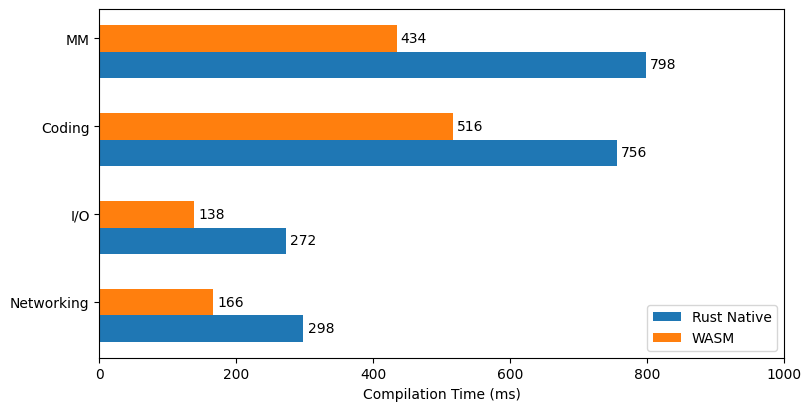

In [212]:
# compilation time

# experiment_tasks = ("Matrix Multiplication", "Huffman Coding", "I/O")
avg_runtimes = {
    'Ubuntu': {
        'Rust Native': (0.798, 0.756, 0.272, 0.298),
        'WASM': (0.434, 0.516, 0.138, 0.166),
    },
    'RaspberryPi': {
        'Rust Native': (3.13, 2.6, 1.21, 1.3),
        'WASM': (4.51, 3.45, 1.36, 1.61),
    }
}

y = np.arange(len(experiment_tasks))[::-1]  # the label locations
width = 0.3  # the width of the bars


fig, ax = plt.subplots(figsize=(8, 4), layout='constrained')
multiplier = 0
platform = platforms[0]
for attribute, measurement in avg_runtimes[platform].items():
    offset = width * multiplier
    rects = ax.barh(y + offset, [m * 1000 for m in measurement], width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_title(platform)
ax.set_xlabel('Compilation Time (ms)')
ax.set_yticks(y + width, experiment_tasks)
ax.tick_params(axis='y', rotation=0)
ax.legend(loc='lower right', ncols=1)
ax.set_xlim(0, 1000)

plt.show()

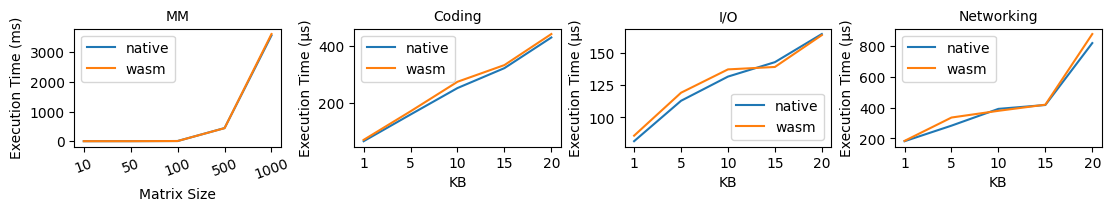

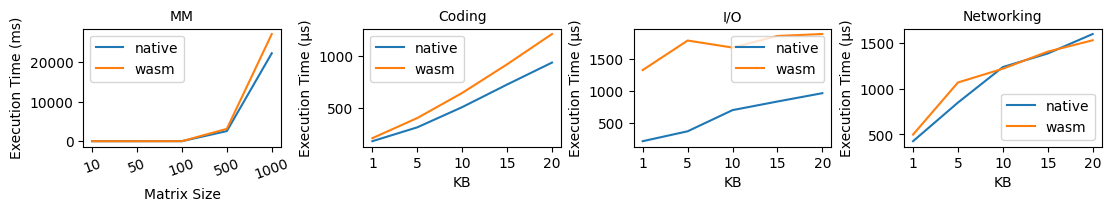

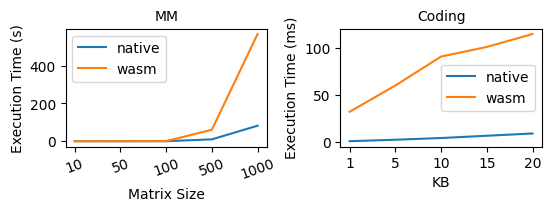

In [167]:
# trends of dataset size vs. native and WASM run time, per task, per platform

def example_plot(ax):
    ax.plot([1, 2])
    ax.set_xlabel('x-label', fontsize=12)
    ax.set_ylabel('y-label', fontsize=12)
    ax.set_title('Title', fontsize=14)

dataset_sizes = {
    'MM': ['10', '50', '100', '500', '1000'],
    'Coding': ['1', '5', '10', '15', '20'],
    'I/O': ['1', '5', '10', '15', '20'],
    'Networking': ['1', '5', '10', '15', '20']
}

data = {
    'Ubuntu':{
        'MM': {
            'native': [0.007, 0.668, 5.954, 442.696, 3570], # ms
            'wasm': [0.09, 0.66, 5.754, 440.894, 3618], # ms
        },
        'Coding': {
            'native': [66.136, 160.068, 253.092, 323.156, 430.998], # µs
            'wasm': [70.81, 171.334, 275.176, 333.884, 443.106], # µs
        },
        'I/O': {
            'native': [81.46, 112.934, 131.782, 143.036, 164.95], # µs
            'wasm': [85.77, 119.218, 137.394, 139.286, 164.108], # µs
        },
        'Networking': {
            'native': [181.916, 282.806, 391.662, 416.844, 818.638], # µs
            'wasm': [184.02, 335.48, 379.072, 418.846, 877.362], # µs
        }
    },
    'RaspberryPi': {
        'MM': {
            'native': [0.01, 0.868, 7.358, 2554, 22222], # ms
            'wasm': [0.013, 1.052, 9.366, 3122, 27078], # ms
        },
        'Coding': {
            'native': [180.064, 313.842, 508.678, 726.758, 938.61], # µs
            'wasm': [209.366, 403.396, 645.748, 921.842, 1214], # µs
        },
        'I/O': {
            'native': [210.064, 365.04, 696.54, 831.438, 961.776], # µs
            'wasm': [1324, 1786, 1676, 1858, 1888], # µs
        },
        'Networking': {
            'native': [426.102, 846.974, 1234, 1382, 1594], # µs
            'wasm': [498, 1066, 1216, 1402, 1526], # µs
        }
    },
    'Android Phone': {
        'MM': {
            'native': [0.000083, 0.01, 0.073, 9.686, 81.816], # s
            'wasm': [0.002, 0.058, 0.467, 60.352, 566.340], # s
        },
        'Coding': {
            'native': [0.693, 2.248, 4.066, 6.486, 8.892], # ms
            'wasm': [32.016, 59.910, 90.704, 100.918, 114.660], # ms
        },
        'I/O': {
            'native': [], # µs
            'wasm': [], # µs
        },
        'Networking': {
            'native': [], # µs
            'wasm': [], # µs
        }
    }
}

# Ubuntu
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(11, 2), layout='constrained')
platform = platforms[0]
units = ['ms', 'µs', 'µs', 'µs']
x_labels = ['Matrix Size', 'KB', 'KB', 'KB']
for i in range(len(experiment_tasks)):
    task = experiment_tasks[i]
    
    axs[i].set_title(task, fontsize=10)
    axs[i].set_xlabel(x_labels[i])
    axs[i].set_ylabel('Execution Time (' + units[i] + ')')
    axs[i].tick_params(axis='x', rotation=20 if i == 0 else 0)
    axs[i].plot(dataset_sizes[task], data[platform][task]['native'], label='native')
    axs[i].plot(dataset_sizes[task], data[platform][task]['wasm'], label='wasm')
    axs[i].legend()


# RaspberryPi
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(11, 2), layout='constrained')
platform = platforms[1]
units = ['ms', 'µs', 'µs', 'µs']
x_labels = ['Matrix Size', 'KB', 'KB', 'KB']
for i in range(len(experiment_tasks)):
    task = experiment_tasks[i]
    
    axs[i].set_title(task, fontsize=10)
    axs[i].set_xlabel(x_labels[i])
    axs[i].set_ylabel('Execution Time (' + units[i] + ')')
    axs[i].tick_params(axis='x', rotation=20 if i == 0 else 0)
    axs[i].plot(dataset_sizes[task], data[platform][task]['native'], label='native')
    axs[i].plot(dataset_sizes[task], data[platform][task]['wasm'], label='wasm')
    axs[i].legend()

# Android
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(5.4, 2), layout='constrained')
platform = platforms[2]
units = ['s', 'ms']
x_labels = ['Matrix Size', 'KB']
for i in range(len(experiment_tasks[0:2])):
    task = experiment_tasks[i]
    
    axs[i].set_title(task, fontsize=10)
    axs[i].set_xlabel(x_labels[i])
    axs[i].set_ylabel('Execution Time (' + units[i] + ')')
    axs[i].tick_params(axis='x', rotation=20 if i == 0 else 0)
    axs[i].plot(dataset_sizes[task], data[platform][task]['native'], label='native')
    axs[i].plot(dataset_sizes[task], data[platform][task]['wasm'], label='wasm')
    axs[i].legend()


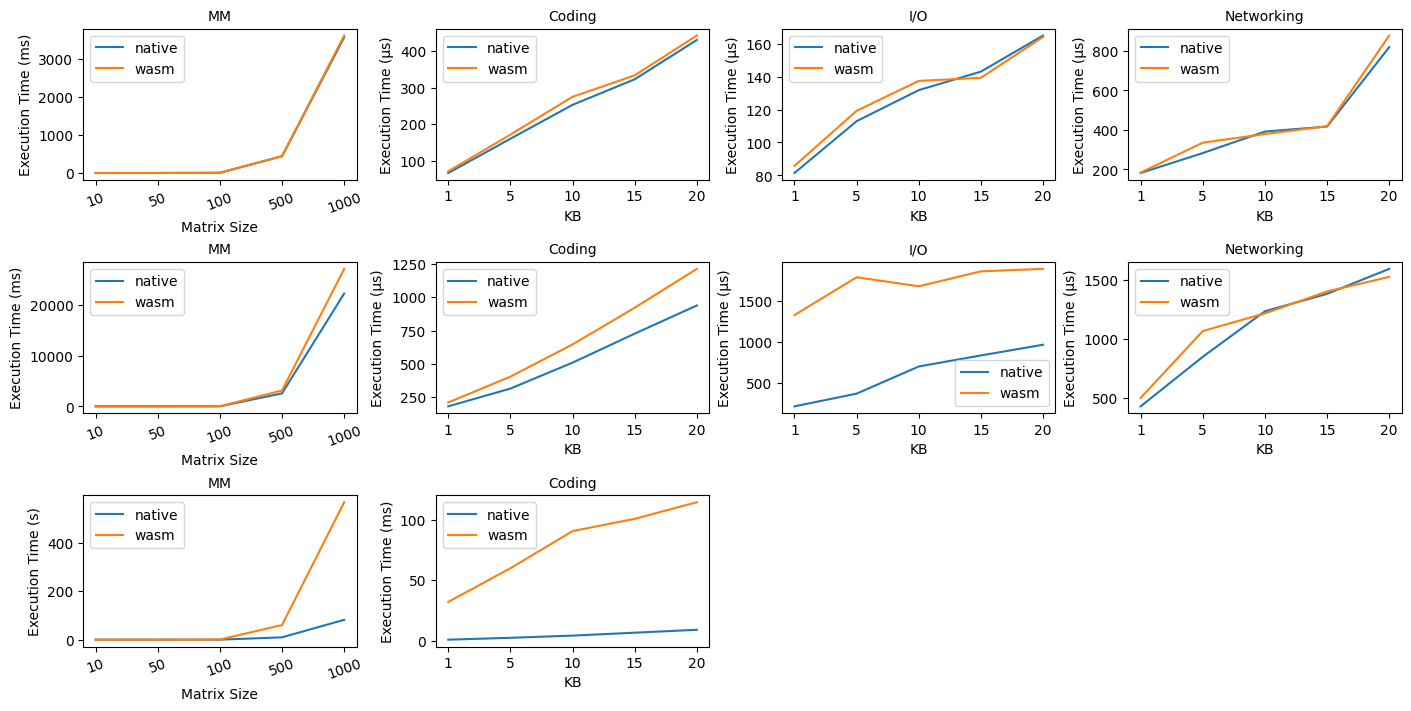

In [185]:
# trends of dataset size vs. native and WASM run time, per task, per platform

def example_plot(ax):
    ax.plot([1, 2])
    ax.set_xlabel('x-label', fontsize=12)
    ax.set_ylabel('y-label', fontsize=12)
    ax.set_title('Title', fontsize=14)

dataset_sizes = {
    'MM': ['10', '50', '100', '500', '1000'],
    'Coding': ['1', '5', '10', '15', '20'],
    'I/O': ['1', '5', '10', '15', '20'],
    'Networking': ['1', '5', '10', '15', '20']
}

data = {
    'Ubuntu':{
        'MM': {
            'native': [0.007, 0.668, 5.954, 442.696, 3570], # ms
            'wasm': [0.09, 0.66, 5.754, 440.894, 3618], # ms
        },
        'Coding': {
            'native': [66.136, 160.068, 253.092, 323.156, 430.998], # µs
            'wasm': [70.81, 171.334, 275.176, 333.884, 443.106], # µs
        },
        'I/O': {
            'native': [81.46, 112.934, 131.782, 143.036, 164.95], # µs
            'wasm': [85.77, 119.218, 137.394, 139.286, 164.108], # µs
        },
        'Networking': {
            'native': [181.916, 282.806, 391.662, 416.844, 818.638], # µs
            'wasm': [184.02, 335.48, 379.072, 418.846, 877.362], # µs
        }
    },
    'RaspberryPi': {
        'MM': {
            'native': [0.01, 0.868, 7.358, 2554, 22222], # ms
            'wasm': [0.013, 1.052, 9.366, 3122, 27078], # ms
        },
        'Coding': {
            'native': [180.064, 313.842, 508.678, 726.758, 938.61], # µs
            'wasm': [209.366, 403.396, 645.748, 921.842, 1214], # µs
        },
        'I/O': {
            'native': [210.064, 365.04, 696.54, 831.438, 961.776], # µs
            'wasm': [1324, 1786, 1676, 1858, 1888], # µs
        },
        'Networking': {
            'native': [426.102, 846.974, 1234, 1382, 1594], # µs
            'wasm': [498, 1066, 1216, 1402, 1526], # µs
        }
    },
    'Android Phone': {
        'MM': {
            'native': [0.000083, 0.01, 0.073, 9.686, 81.816], # s
            'wasm': [0.002, 0.058, 0.467, 60.352, 566.340], # s
        },
        'Coding': {
            'native': [0.693, 2.248, 4.066, 6.486, 8.892], # ms
            'wasm': [32.016, 59.910, 90.704, 100.918, 114.660], # ms
        },
        'I/O': {
            'native': [], # µs
            'wasm': [], # µs
        },
        'Networking': {
            'native': [], # µs
            'wasm': [], # µs
        }
    }
}

# Ubuntu
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(14, 7), layout='constrained')
platform = platforms[0]
units = ['ms', 'µs', 'µs', 'µs']
x_labels = ['Matrix Size', 'KB', 'KB', 'KB']
for i in range(len(experiment_tasks)):
    task = experiment_tasks[i]
    
    axs[0][i].set_title(task, fontsize=10)
    axs[0][i].set_xlabel(x_labels[i])
    axs[0][i].set_ylabel('Execution Time (' + units[i] + ')')
    axs[0][i].tick_params(axis='x', rotation=20 if i == 0 else 0)
    axs[0][i].plot(dataset_sizes[task], data[platform][task]['native'], label='native')
    axs[0][i].plot(dataset_sizes[task], data[platform][task]['wasm'], label='wasm')
    axs[0][i].legend()


# RaspberryPi
# fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(11, 2), layout='constrained')
platform = platforms[1]
units = ['ms', 'µs', 'µs', 'µs']
x_labels = ['Matrix Size', 'KB', 'KB', 'KB']
for i in range(len(experiment_tasks)):
    task = experiment_tasks[i]
    
    axs[1][i].set_title(task, fontsize=10)
    axs[1][i].set_xlabel(x_labels[i])
    axs[1][i].set_ylabel('Execution Time (' + units[i] + ')')
    axs[1][i].tick_params(axis='x', rotation=20 if i == 0 else 0)
    axs[1][i].plot(dataset_sizes[task], data[platform][task]['native'], label='native')
    axs[1][i].plot(dataset_sizes[task], data[platform][task]['wasm'], label='wasm')
    axs[1][i].legend()

# Android
# fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(5.4, 2), layout='constrained')
platform = platforms[2]
units = ['s', 'ms']
x_labels = ['Matrix Size', 'KB']
for i in range(len(experiment_tasks)):
    if i >= 2:
        axs[2][i].axis('off')
        continue
        
    task = experiment_tasks[i]
    
    axs[2][i].set_title(task, fontsize=10)
    axs[2][i].set_xlabel(x_labels[i])
    axs[2][i].set_ylabel('Execution Time (' + units[i] + ')')
    axs[2][i].tick_params(axis='x', rotation=20 if i == 0 else 0)
    axs[2][i].plot(dataset_sizes[task], data[platform][task]['native'], label='native')
    axs[2][i].plot(dataset_sizes[task], data[platform][task]['wasm'], label='wasm')
    axs[2][i].legend()


In [166]:
# bar charts of the native and WASM run time with the largest dataset vs. different platform, per task


